## Goal

We want to first pre-process the dataset to eliminate any redundancy so that we can focus our attention on a useful and simplified dataset

## Import libraries

In [1]:
import pandas as pd
import numpy as np

## Load the file

In [2]:
file_path = 'imu_data.log'
with open(file_path, 'r') as file:
    data = file.readlines()

## What does the data look like?

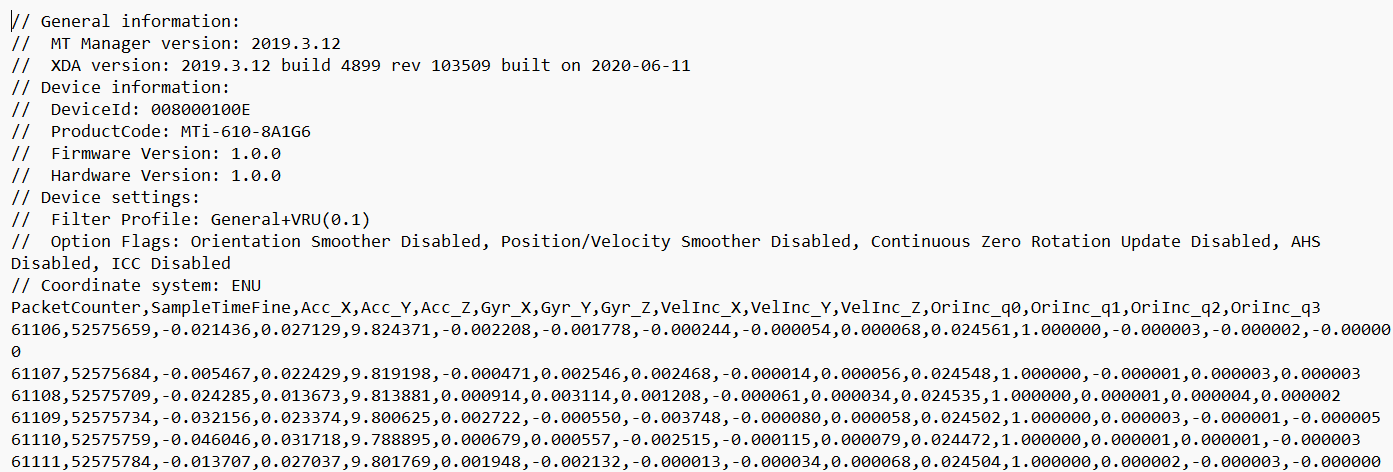

## Locate where the actual data starts

In [3]:
data_start_index = None
for index, line in enumerate(data):
    if not line.startswith('//'):
        data_start_index = index
        break

## Read the data into a DataFrame skipping the initial metadata line

In [4]:
df = pd.read_csv(file_path, skiprows=data_start_index)

1. Pandas is a powerful Python library for data wrangling
2. DataFrames are data structures that are similar to excel spreadsheets

## Investigate timestamps

In [5]:
t_array = np.array(df['SampleTimeFine'].values)
dt_array = 10**-4 * np.diff(t_array)
if all(dt_array > 0):
    print("Timestamps are in the correct order...")
dt_unique_array = np.unique(dt_array)
len_dt_unique = len(dt_unique_array)
if len_dt_unique == 1:
    print("Sampling rate is fixed...")
dt = dt_unique_array.item()
print(f"Sampling interval dt: {dt:.1e} seconds")
print("----------------------------------")

Timestamps are in the correct order...
Sampling rate is fixed...
Sampling interval dt: 2.5e-03 seconds
----------------------------------


## Check if velocity increments are redundant

In [6]:
vel_x_check_arr = np.abs(np.array(df['Acc_X']*dt - df['VelInc_X']))
vel_x_check_max, vel_x_check_mean, vel_x_check_min = vel_x_check_arr.max(), vel_x_check_arr.mean(), vel_x_check_arr.min()
print(f"vel_x_checks, max: {vel_x_check_max:.1e}, mean: {vel_x_check_mean:.1e}, min: {vel_x_check_min:.1e}")

vel_y_check_arr = np.abs(np.array(df['Acc_Y']*dt - df['VelInc_Y']))
vel_y_check_max, vel_y_check_mean, vel_y_check_min = vel_y_check_arr.max(), vel_y_check_arr.mean(), vel_y_check_arr.min()
print(f"vel_y_checks, max: {vel_y_check_max:.1e}, mean: {vel_y_check_mean:.1e}, min: {vel_y_check_min:.1e}")

vel_z_check_arr = np.abs(np.array(df['Acc_Z']*dt - df['VelInc_Z']))
vel_z_check_max, vel_z_check_mean, vel_z_check_min = vel_z_check_arr.max(), vel_z_check_arr.mean(), vel_z_check_arr.min()
print(f"vel_z_checks, max: {vel_z_check_max:.1e}, mean: {vel_z_check_mean:.1e}, min: {vel_z_check_min:.1e}")

print("Velocity increment data is redundant...")
print("----------------------------------")

vel_x_checks, max: 2.1e-04, mean: 4.9e-06, min: 0.0e+00
vel_y_checks, max: 1.8e-04, mean: 4.7e-06, min: 0.0e+00
vel_z_checks, max: 1.5e-04, mean: 5.5e-06, min: 0.0e+00
Velocity increment data is redundant...
----------------------------------


## Check if orientation increments are redundant

In [7]:
ori_x_check_arr = np.abs(np.array(df['Gyr_X']*(dt/2) - df['OriInc_q1']))
ori_x_check_max, ori_x_check_mean, ori_x_check_min = ori_x_check_arr.max(), ori_x_check_arr.mean(), ori_x_check_arr.min()
print(f"ori_x_checks, max: {ori_x_check_max:.1e}, mean: {ori_x_check_mean:.1e}, min: {ori_x_check_min:.1e}")

ori_y_check_arr = np.abs(np.array(df['Gyr_Y']*(dt/2) - df['OriInc_q2']))
ori_y_check_max, ori_y_check_mean, ori_y_check_min = ori_y_check_arr.max(), ori_y_check_arr.mean(), ori_y_check_arr.min()
print(f"ori_y_checks, max: {ori_y_check_max:.1e}, mean: {ori_y_check_mean:.1e}, min: {ori_y_check_min:.1e}")

ori_z_check_arr = np.abs(np.array(df['Gyr_Z']*(dt/2) - df['OriInc_q3']))
ori_z_check_max, ori_z_check_mean, ori_z_check_min = ori_z_check_arr.max(), ori_z_check_arr.mean(), ori_z_check_arr.min()
print(f"ori_z_checks, max: {ori_z_check_max:.1e}, mean: {ori_z_check_mean:.1e}, min: {ori_z_check_min:.1e}")

print("Orientation increment data is redundant...")
print("----------------------------------")

ori_x_checks, max: 5.3e-07, mean: 2.5e-07, min: 0.0e+00
ori_y_checks, max: 5.4e-07, mean: 2.5e-07, min: 0.0e+00
ori_z_checks, max: 5.1e-07, mean: 2.5e-07, min: 0.0e+00
Orientation increment data is redundant...
----------------------------------
